In [182]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_answer = pd.read_csv('gender_submission.csv')

In [184]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


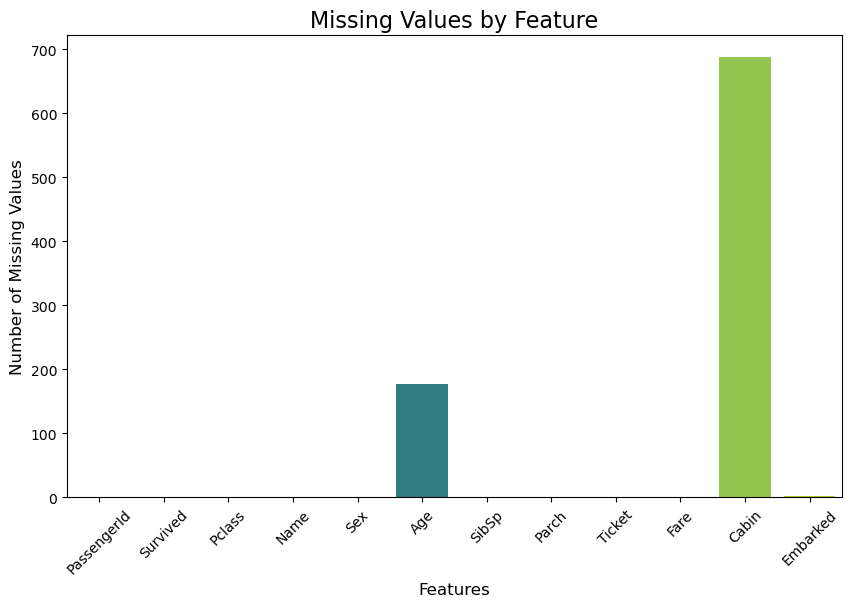

In [185]:
missing_values = df_train.isnull().sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')


plt.title('Missing Values by Feature', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)
plt.xticks(rotation=45)  
plt.show()


In [186]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [187]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [188]:
df_train = df_train.drop(columns=['PassengerId', 'Name','Ticket','Cabin'],axis=1)
df_test = df_test.drop(columns=['PassengerId', 'Name','Ticket','Cabin'],axis=1)

In [189]:
df_train = pd.get_dummies(df_train, columns=['Sex'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Sex'], drop_first=True)

In [190]:
df_train['Sex_male'] = df_train['Sex_male'].astype(int)
df_test['Sex_male'] = df_test['Sex_male'].astype(int)

In [191]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [192]:
mapping = {'S': 0, 'C': 1, 'Q': 2}
df_train['Embarked'] = df_train['Embarked'].map(mapping).fillna(-1).astype(int)
df_test['Embarked'] = df_test['Embarked'].map(mapping).fillna(-1).astype(int)

In [193]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,0,0
3,1,1,35.0,1,0,53.1000,0,0
4,0,3,35.0,0,0,8.0500,0,1


In [194]:
age_mean = df_train['Age'].mean()
df_train['Age'] = df_train['Age'].fillna(age_mean)

In [195]:
y = df_train['Survived']
x = df_train.drop('Survived', axis=1)

In [196]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=24)

In [197]:
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,3,34.5,0,0,7.8292,2,1
1,3,47.0,1,0,7.0000,0,0
2,2,62.0,0,0,9.6875,2,1
3,3,27.0,0,0,8.6625,0,1
4,3,22.0,1,1,12.2875,0,0


In [198]:
lr = LogisticRegression(random_state=42, max_iter=200)
model = lr.fit(x_train, y_train)

In [199]:
model.score(x_test,y_test)

0.8283582089552238

In [200]:
y_pred = model.predict(x_test)


In [201]:
age_mean = df_test['Age'].mean()
df_test['Age'] = df_test['Age'].fillna(age_mean)

In [202]:
df_test.isnull().sum()

Pclass      0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
Sex_male    0
dtype: int64

In [203]:
Fare_mean = df_test['Fare'].mean()
df_test['Fare'] = df_test['Fare'].fillna(age_mean)

In [204]:
y2 = df_answer['Survived']
x2 = df_test

In [205]:
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,3,34.5,0,0,7.8292,2,1
1,3,47.0,1,0,7.0000,0,0
2,2,62.0,0,0,9.6875,2,1
3,3,27.0,0,0,8.6625,0,1
4,3,22.0,1,1,12.2875,0,0


In [206]:
model.score(x2,y2)

0.9521531100478469

In [207]:
rfc = RandomForestClassifier(n_estimators=51)
model2 = rfc.fit(x_train, y_train)

In [208]:
model2.score(x2,y2)

0.7918660287081339

In [209]:
model2.score(x_test,y_test)

0.8208955223880597